<a href="https://colab.research.google.com/github/deepakpkaggle/kaggle_twitter_disaster/blob/main/Kaggle_Twitter_Disaster_Tweets_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install pyspellchecker textblob

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.4/3.4 MB 33.6 MB/s eta 0:00:00


In [ ]:
# Importing all the relevant packages and libraries

import pandas as pd
import nltk
import re
from nltk.corpus import stopwords
import string
import spellchecker
from textblob import TextBlob

from nltk.stem import WordNetLemmatizer
import matplotlib.pyplot as plt

from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay, classification_report
from sklearn.feature_extraction.text import CountVectorizer,TfidfTransformer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB, GaussianNB
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier

from sklearn.pipeline import Pipeline

from scipy.sparse import bsr_matrix

In [ ]:
# Downloading relevant corpus
nltk.download(['wordnet','stopwords'])

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
%%sh
df -kh /content/drive

Filesystem      Size  Used Avail Use% Mounted on
drive            15G     0   15G   0% /content/drive


In [ ]:
%%sh
cd '/content/drive/MyDrive/Kaggle Data/NLP_Disaster_Tweets'
ls -ltr

total 1399
-rw------- 1 root root  22746 Jun  1 05:41 sample_submission.csv
-rw------- 1 root root 420783 Jun  1 05:41 test.csv
-rw------- 1 root root 987712 Jun  1 05:41 train.csv


In [ ]:
%%sh 
pwd

/content


In [ ]:
train_data = pd.read_csv('/content/drive/MyDrive/Kaggle Data/NLP_Disaster_Tweets/train.csv')
train_data = train_data[['text','target']]
train_data['type']='training'

test_data = pd.read_csv('/content/drive/MyDrive/Kaggle Data/NLP_Disaster_Tweets/test.csv')
test_data = test_data[['text']]
test_data['type']='test'

In [ ]:
data = pd.concat([train_data,test_data])
data = data.drop_duplicates(subset=['text'])

In [ ]:
# Lowering the text
data['text'] = data['text'].str.lower()

In [ ]:
data.shape

(10876, 3)

In [ ]:
data.isna().sum()

text         0
target    3175
type         0
dtype: int64

In [ ]:
data.head()

,text,target,type
0,our deeds are the reason of this #earthquake m...,1.0,training
1,forest fire near la ronge sask. canada,1.0,training
2,all residents asked to 'shelter in place' are ...,1.0,training
3,"13,000 people receive #wildfires evacuation or...",1.0,training
4,just got sent this photo from ruby #alaska as ...,1.0,training


In [ ]:
text = list(data['text'])

lemmatizer = WordNetLemmatizer()

In [ ]:
# Text Preprocessing as below:
# Removing URLS, Removing Hashtagsd, Tweet Tags, Contractions, Digits, Linebreaks, Stopwords
corpus = []
contractions_fixed = []
PUNC_TO_REMOVE = string.punctuation
spelling_mistakes = []
spell = spellchecker.SpellChecker()
words_removed = []
count = 0

for tweet in text:
  # Removing URLS
  tweet = re.sub(r'http\S+','',tweet)

  # Remove Hashtags
  tweet = re.sub(r'#*','',tweet)

  # Remove Tweet Tags
  tweet = re.sub(r'@\S+','',tweet)

  # Removing Punctuations
  tweet = tweet.translate(str.maketrans('','',PUNC_TO_REMOVE))

  # Removing Contractions
  contract_tweet = contractions.fix(tweet)
  if tweet != contract_tweet:
    contractions_fixed.append((tweet,contract_tweet))

  tweet = contract_tweet

  # Removing the Digits
  tweet = re.sub(r'\w*\d\w*', '', tweet)

  # Removing Line Breaks
  tweet = re.sub(r'\n', '', tweet)

  tweet = tweet.split()

  tweet = [word for word in tweet if word not in stopwords.words('english')] 

  # tweet_cleaned  =[]

  # for word in tweet:
  #    word = lemmatizer.lemmatize(word).lower()
  #    check_mispelt = list(spell.unknown([word]))
  #    if len(check_mispelt) > 0 and (check_mispelt[0] != str(TextBlob(check_mispelt[0]).correct())):
  #     tweet_cleaned.append(str(TextBlob(check_mispelt[0]).correct()))

  tweet = [lemmatizer.lemmatize(word).lower() for word in tweet]  

  # Checking for spelling mistakes
  # misspelled_words = list(spell.unknown(tweet))

  # for word in misspelled_words:
  #   word_corrected = TextBlob(word).correct()
  #   if word_corrected != word

  tweet = str(TextBlob(' '.join(tweet)).correct())

  corpus.append(tweet)
  print(f'Executing {count+1} time')
  count = count+1

Streaming output truncated to the last 5000 lines.
Executing 5679 time
Executing 5680 time
Executing 5681 time
Executing 5682 time
Executing 5683 time
Executing 5684 time
Executing 5685 time
Executing 5686 time
Executing 5687 time
Executing 5688 time
Executing 5689 time
Executing 5690 time
Executing 5691 time
Executing 5692 time
Executing 5693 time
Executing 5694 time
Executing 5695 time
Executing 5696 time
Executing 5697 time
Executing 5698 time
Executing 5699 time
Executing 5700 time
Executing 5701 time
Executing 5702 time
Executing 5703 time
Executing 5704 time
Executing 5705 time
Executing 5706 time
Executing 5707 time
Executing 5708 time
Executing 5709 time
Executing 5710 time
Executing 5711 time
Executing 5712 time
Executing 5713 time
Executing 5714 time
Executing 5715 time
Executing 5716 time
Executing 5717 time
Executing 5718 time
Executing 5719 time
Executing 5720 time
Executing 5721 time
Executing 5722 time
Executing 5723 time
Executing 5724 time
Executing 5725 time
Executing

In [ ]:
data['text_cleaned'] = corpus

In [ ]:
# Writng to Parquet after doing 1st Iteration Text Pre-Processing

data.to_parquet('/content/drive/MyDrive/Kaggle Data/NLP_Disaster_Tweets/corrected_iter1.parquet.gzip',compression='gzip')

In [ ]:
# re-Reading the Parqueta and cleaned data

data = pd.read_parquet('/content/drive/MyDrive/Kaggle Data/NLP_Disaster_Tweets/corrected_iter1.parquet.gzip')

In [ ]:
# Starting the 2nd Iteration of Pre-processing. It Includes as below:
# Removing the words are misspelt and cannot be corrected

text = list(data['text_cleaned'])

In [ ]:
corpus = []
for tweet in text:
  tweet = tweet.split()
  misspelled_words = list(spell.unknown(tweet))
  if len(misspelled_words) > 0:
    for word in misspelled_words:
      tweet.remove(word)
  
  tweet = ' '.join(tweet)
  corpus.append(tweet)

In [ ]:
data['text_cleaned'] = corpus

In [ ]:
# Writing the 2nd Iteration of Pre-Processed Text Data

data.to_parquet('/content/drive/MyDrive/Kaggle Data/NLP_Disaster_Tweets/corrected_iter2.parquet.gzip',compression='gzip')

In [ ]:
data = pd.read_parquet('/content/drive/MyDrive/Kaggle Data/NLP_Disaster_Tweets/corrected_iter2.parquet.gzip')

In [ ]:
data.head()

,text,target,type,text_cleaned
0,our deeds are the reason of this #earthquake m...,1.0,training,deed reason earthquake may allah forgive u
1,forest fire near la ronge sask. canada,1.0,training,forest fire near la range ask canada
2,all residents asked to 'shelter in place' are ...,1.0,training,resident asked shelter place notified officer ...
3,"13,000 people receive #wildfires evacuation or...",1.0,training,people receive wildlife evacuation order calif...
4,just got sent this photo from ruby #alaska as ...,1.0,training,got sent photo ruby alaska smoke wildlife hour...


In [ ]:
train_val = data[data.type=='training'][['text_cleaned','target']]
test = data[data.type=='test'][['text_cleaned']]

In [ ]:
train_val.head()

,text_cleaned,target
0,deed reason earthquake may allah forgive u,1.0
1,forest fire near la range ask canada,1.0
2,resident asked shelter place notified officer ...,1.0
3,people receive wildlife evacuation order calif...,1.0
4,got sent photo ruby alaska smoke wildlife hour...,1.0


In [ ]:
X_train, X_val, y_train, y_val = train_test_split(train_val['text_cleaned'],train_val['target'],stratify = train_val['target'])

In [ ]:

# # cv = CountVectorizer()

# # Creating a Pipeline of CountVectorizer (Preprocessing), TF-IDF (Preprocessing), LogisticRegressor(Modelling)
# text_clf_pipeline = Pipeline([
#     ('cv',CountVectorizer()),
#     ('tfidf',TfidfTransformer()),
#     ('clf',LogisticRegression())
# ])

# # Training the Model
# text_clf_pipeline.fit(X_train,y_train)

Pipeline(steps=[('cv', CountVectorizer()), ('tfidf', TfidfTransformer()),
                ('clf', LogisticRegression())])

In [ ]:
class Modeling:
  def __init__(self,classfiers_):
    self.classifiers_= classfiers_
    # print(self.classifiers_)
    self.models = {}
    self.trained_models = {}
    self.predictions = {}
  
  def get_cv(self):
    return ('cv',CountVectorizer())

  def get_tfidf(self):
    return ('tdidf',TfidfTransformer())

  def set_ml_model(self):
    for name,model_obj in self.classifiers_.items():
      pipeline_meta = []
      pipeline_meta.append(self.get_cv())
      pipeline_meta.append(self.get_tfidf())
      pipeline_meta.append(('clf',model_obj))
      self.models[name] = Pipeline(pipeline_meta)
      # print(self.models)

  def train_ml_model(self,features,target):
    for model_name, pipeline_obj in self.models.items():
      self.trained_models[model_name] = pipeline_obj.fit(features,target)

  def predict_target(self,features):
      for model_name, fitted_model_obj in self.trained_models.items():
        self.predictions[model_name] = fitted_model_obj.predict(features)

  def evaluate_ml_model(self,true_target):
    for model_name, predictions in self.predictions.items():
      print(f"Accuracy using Model {model_name}:  {accuracy_score(true_target,predictions)}")

In [ ]:
models_dict = {
    'Logistic Regression': LogisticRegression(),
    'Mutinomial Naive Bayes': MultinomialNB(),
    'K Nearest Neighbors': KNeighborsClassifier(3),
    'SVM Kernel': SVC(kernel="linear", C=0.025),
    'SVM Gamma': SVC(gamma=2, C=1),
    'Decision Tree': DecisionTreeClassifier(max_depth=5),
    'Random Forest':RandomForestClassifier(max_depth=5, n_estimators=10, max_features=1),
    'MLP Classifier':MLPClassifier(alpha=1, max_iter=1000),
    'Ada Boost': AdaBoostClassifier(),
}

# models_dict = {}
# for num in range(1,50):
#   name = 'K Nearest Neighbor '+str(num)
#   models_dict[name]=KNeighborsClassifier(num)

model = Modeling(models_dict)
model.set_ml_model()
model.train_ml_model(X_train,y_train)
model.predict_target(X_val)
model.evaluate_ml_model(y_val)

Accuracy using Model Logistic Regression:  0.7931769722814499
Accuracy using Model Mutinomial Naive Bayes:  0.7921108742004265
Accuracy using Model K Nearest Neighbors:  0.6849680170575693
Accuracy using Model SVM Kernel:  0.576226012793177
Accuracy using Model SVM Gamma:  0.7729211087420043
Accuracy using Model Decision Tree:  0.6391257995735607
Accuracy using Model Random Forest:  0.5746268656716418
Accuracy using Model MLP Classifier:  0.7867803837953091
Accuracy using Model Ada Boost:  0.7430703624733476


In [ ]:
model.predictions

{'Logistic Regression': array([1., 0., 1., ..., 0., 0., 0.])}

In [ ]:
# Predicting the Values of Validation Data Set
predictions = text_clf_pipeline.predict(X_val)

In [ ]:
# X_train_cv = cv.fit_transform(X_train)
# X_train_cv.shape

# lr = LogisticRegression()
# lr.fit(X_train_cv,y_train)
# X_val_cv = cv.transform(X_val)
# predictions = lr.predict(X_val_cv)
# predictions_df = pd.DataFrame(predictions)
# predictions_df.value_counts()
# predictions.shape

In [ ]:
text_clf_pipeline.score(X_val,y_val)

0.8171641791044776

In [ ]:
accuracy_score(y_val,predictions)

0.8171641791044776

In [ ]:
disp = ConfusionMatrixDisplay(confusion_matrix = confusion_matrix(y_val,predictions),display_labels = lr.classes_)

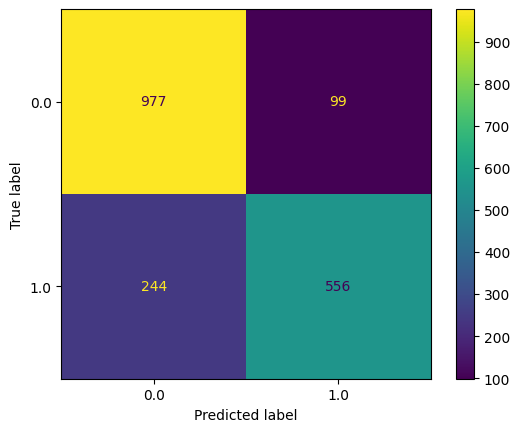

In [ ]:
disp.plot()

In [ ]:
print(classification_report(y_val,predictions))

              precision    recall  f1-score   support

         0.0       0.80      0.91      0.85      1076
         1.0       0.85      0.69      0.76       800

    accuracy                           0.82      1876
   macro avg       0.82      0.80      0.81      1876
weighted avg       0.82      0.82      0.81      1876

